In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("ev_battery_charging_data.csv")
df

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,Normal,98.055096,LiFePO4,236,Model C,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,Normal,97.635504,LiFePO4,957,Model A,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,Fast,97.889367,LiFePO4,997,Model C,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,Normal,97.596647,LiFePO4,435,Model B,1


In [28]:
df.columns

Index(['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)',
       'Ambient Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)',
       'Charging Mode', 'Efficiency (%)', 'Battery Type', 'Charging Cycles',
       'EV Model', 'Optimal Charging Duration Class'],
      dtype='object')

# Generating heat map of the Dataset

<Axes: >

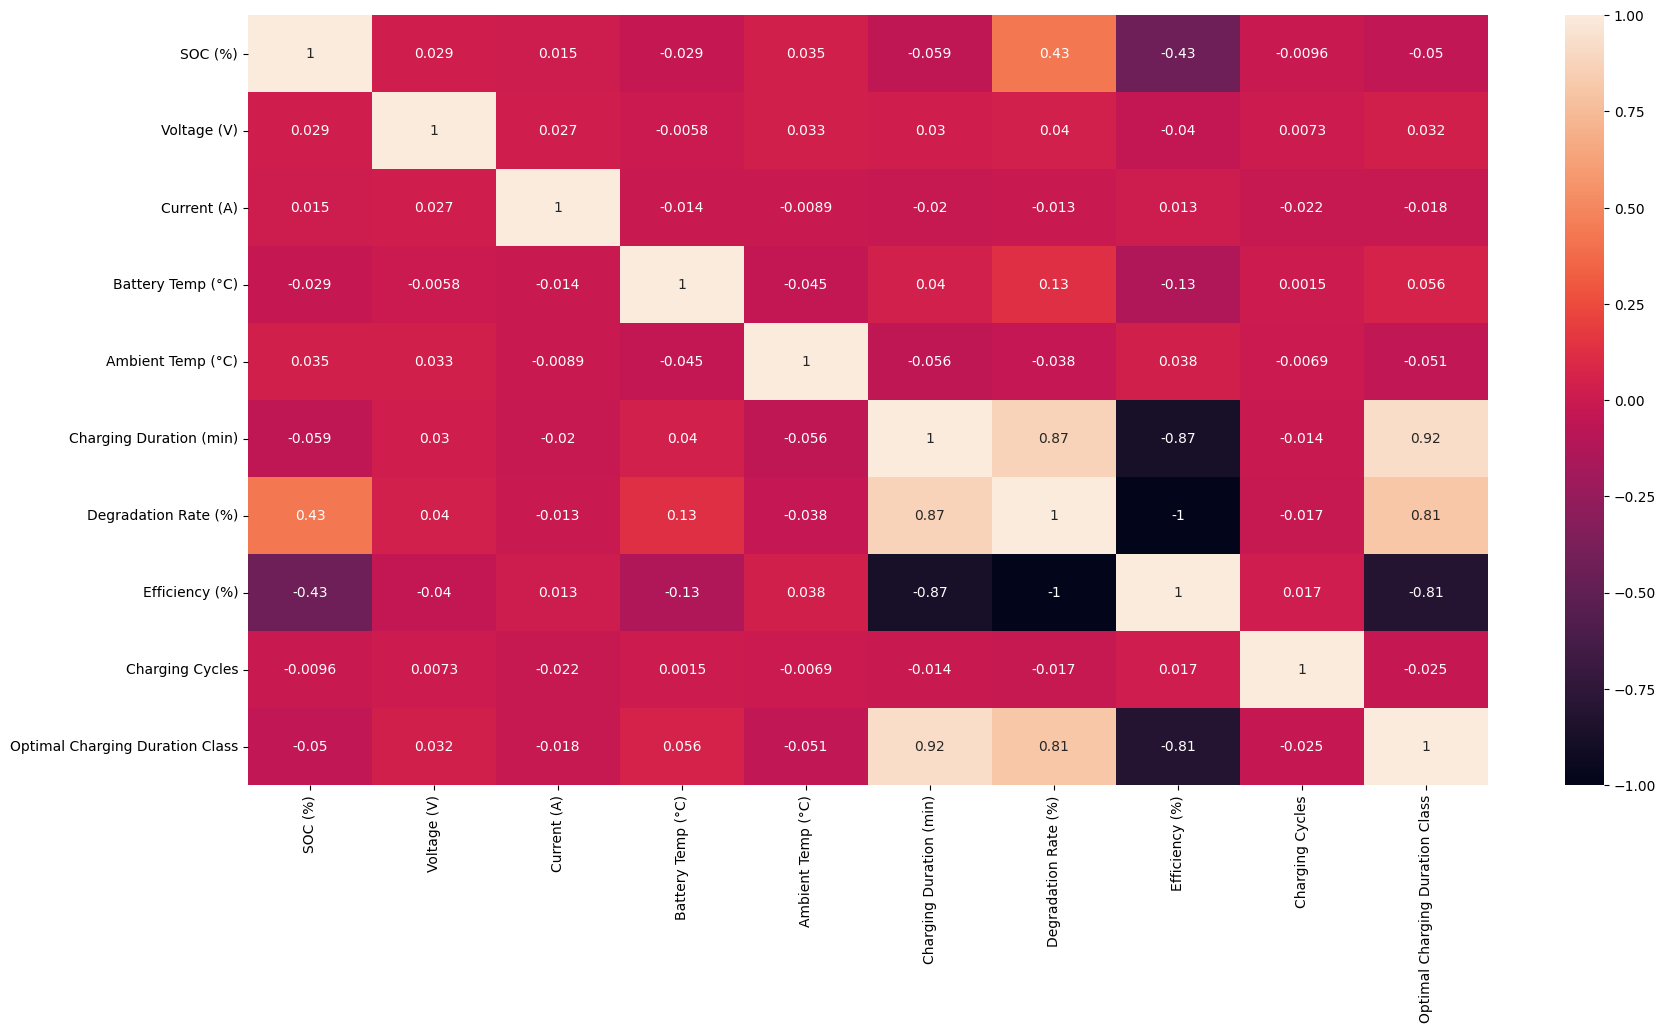

In [29]:
plt.figure(figsize=(20,10))
copy = df.corr(numeric_only=True)

sns.heatmap(copy, annot=True)

# Preprocessing of data -> categorical to numeric

In [30]:
df['Charging Mode'].unique()
df['Charging Mode'] = df['Charging Mode'].map({'Slow':0, 'Normal':1, 'Fast':2})

df['Battery Type'].unique()
df['Battery Type'] = df['Battery Type'].map({'Li-ion':0, 'LiFePO4':1})

df['EV Model'].unique()
df['EV Model'] = df['EV Model'].map({'Model A':0, 'Model B':1, 'Model C':2})

In [31]:
df

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,2,98.238981,0,112,1,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,2,97.562628,1,398,0,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,0,97.233533,1,175,0,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,2,98.136225,1,150,1,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,2,97.662485,0,886,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,1,98.055096,1,236,2,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,1,97.635504,1,957,0,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,2,97.889367,1,997,2,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,1,97.596647,1,435,1,1


# Calculating the VIF to check for the multicolinearity

In [81]:
X = df

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,features,VIF
0,SOC (%),inf
1,Voltage (V),1.007039
2,Current (A),1.004490
3,Battery Temp (°C),inf
4,Ambient Temp (°C),1.011171
5,Charging Duration (min),inf
6,Degradation Rate (%),inf
7,Charging Mode,1.006643
8,Efficiency (%),407.471893
9,Battery Type,1.007998


In [82]:
drop_columns = ['SOC (%)']
X = X.drop(columns=drop_columns)


vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data




drop_columns = ['Optimal Charging Duration Class']
X = X.drop(columns=drop_columns)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,features,VIF
0,Voltage (V),1.006912
1,Current (A),1.004487
2,Battery Temp (°C),1.042508
3,Ambient Temp (°C),1.011166
4,Charging Duration (min),4.185983
5,Degradation Rate (%),62.519625
6,Charging Mode,1.006596
7,Efficiency (%),403.098225
8,Battery Type,1.007866
9,Charging Cycles,1.002169


In [85]:
x = X.drop(columns=['Efficiency (%)', 'Degradation Rate (%)'])
y = X['Degradation Rate (%)']

In [86]:
x

,Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Charging Mode,Battery Type,Charging Cycles,EV Model
0,3.629593,33.553512,33.454060,26.439918,59.363552,2,0,112,1
1,3.879331,32.228092,35.933628,31.108647,67.343566,2,1,398,0
2,4.111062,91.562912,25.009358,30.203219,105.454739,0,1,175,0
3,4.012557,32.459158,32.497482,18.077998,54.000439,2,1,150,1
4,4.064593,34.475475,31.434920,17.984989,106.964968,2,0,886,2
...,...,...,...,...,...,...,...,...,...
995,3.959869,87.876618,28.842141,32.947946,88.443536,1,1,236,2
996,4.169630,24.154589,26.688024,17.387620,70.322041,1,1,957,0
997,3.548271,37.880907,27.891446,21.556857,96.514885,2,1,997,2
998,3.539938,36.104098,30.598812,31.314908,68.529063,1,1,435,1


In [87]:
pip install xgboost lightgbm scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)


ensemble = VotingRegressor(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('mlp', mlp)
])


# Train ensemble
ensemble.fit(X_train, y_train)

# Predict
y_pred = ensemble.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score 10.036374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

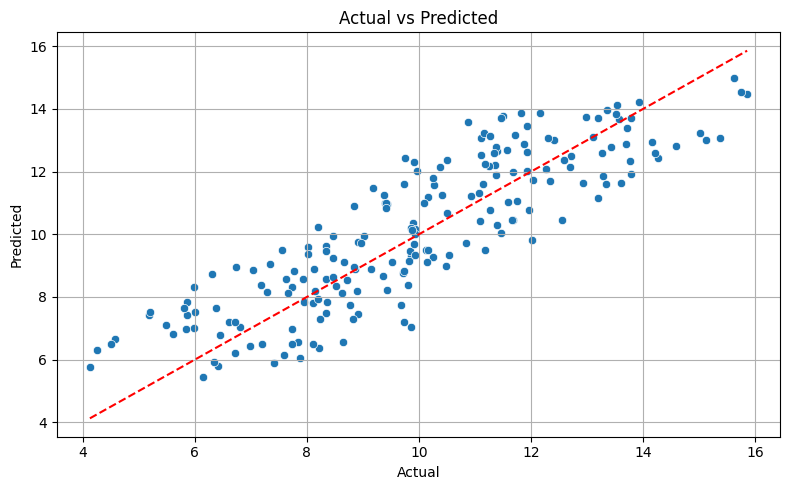

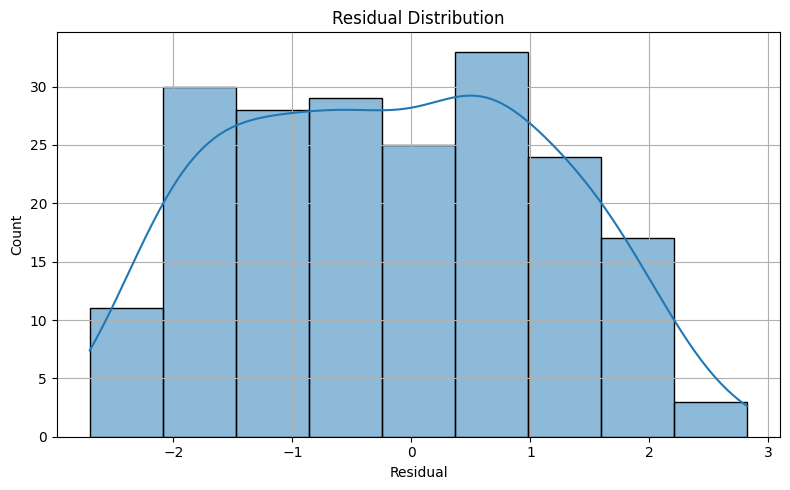

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions vs Actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

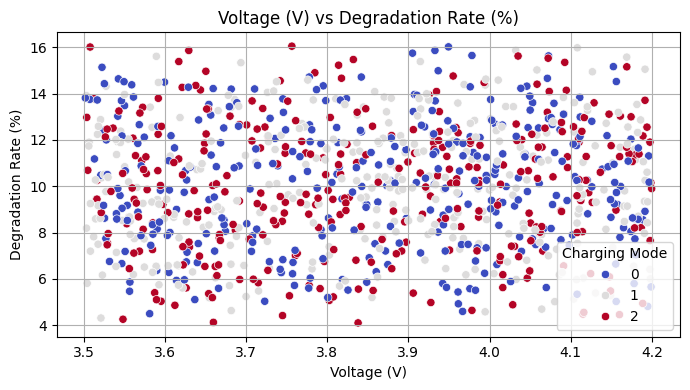

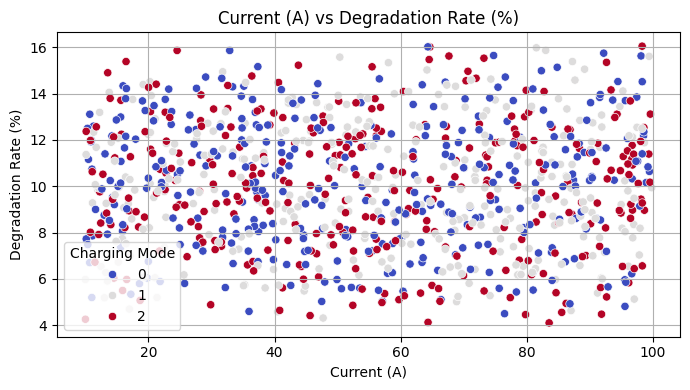

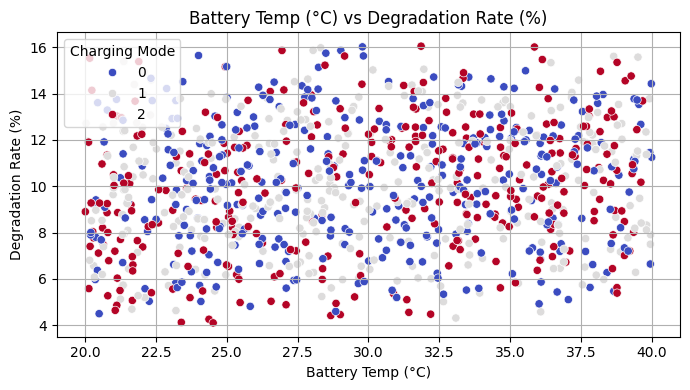

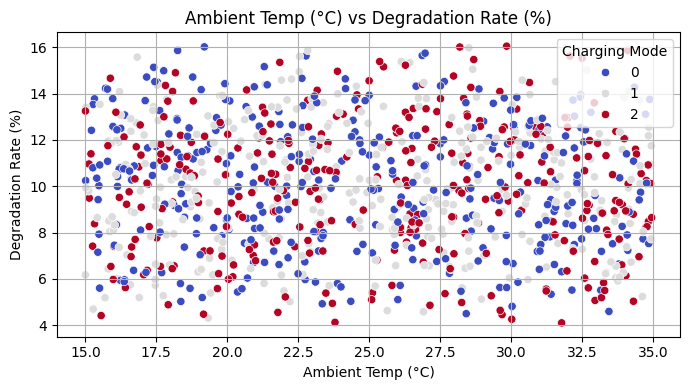

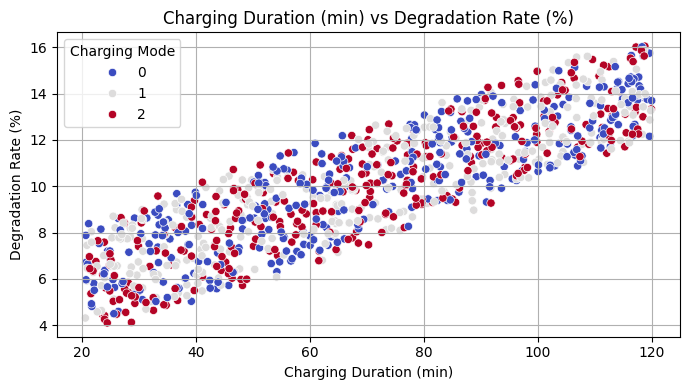

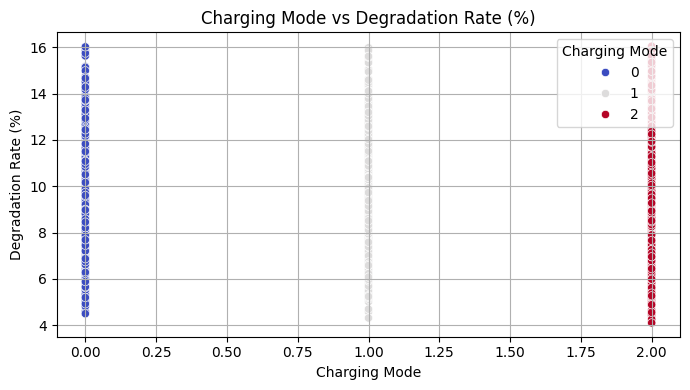

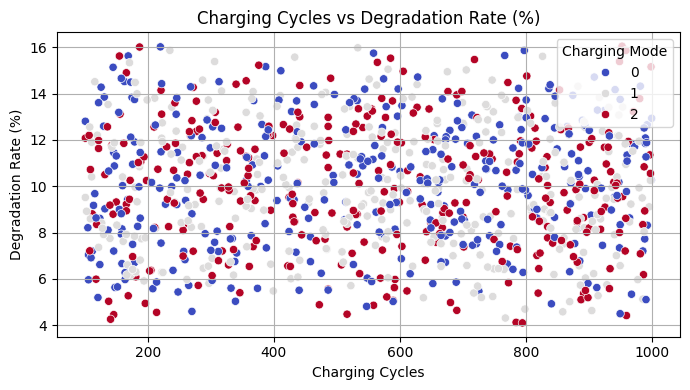

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)',
                    'Charging Duration (min)', 'Charging Mode', 'Charging Cycles']

for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=X, x=feature, y='Degradation Rate (%)', hue='Charging Mode', palette='coolwarm')
    plt.title(f'{feature} vs Degradation Rate (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

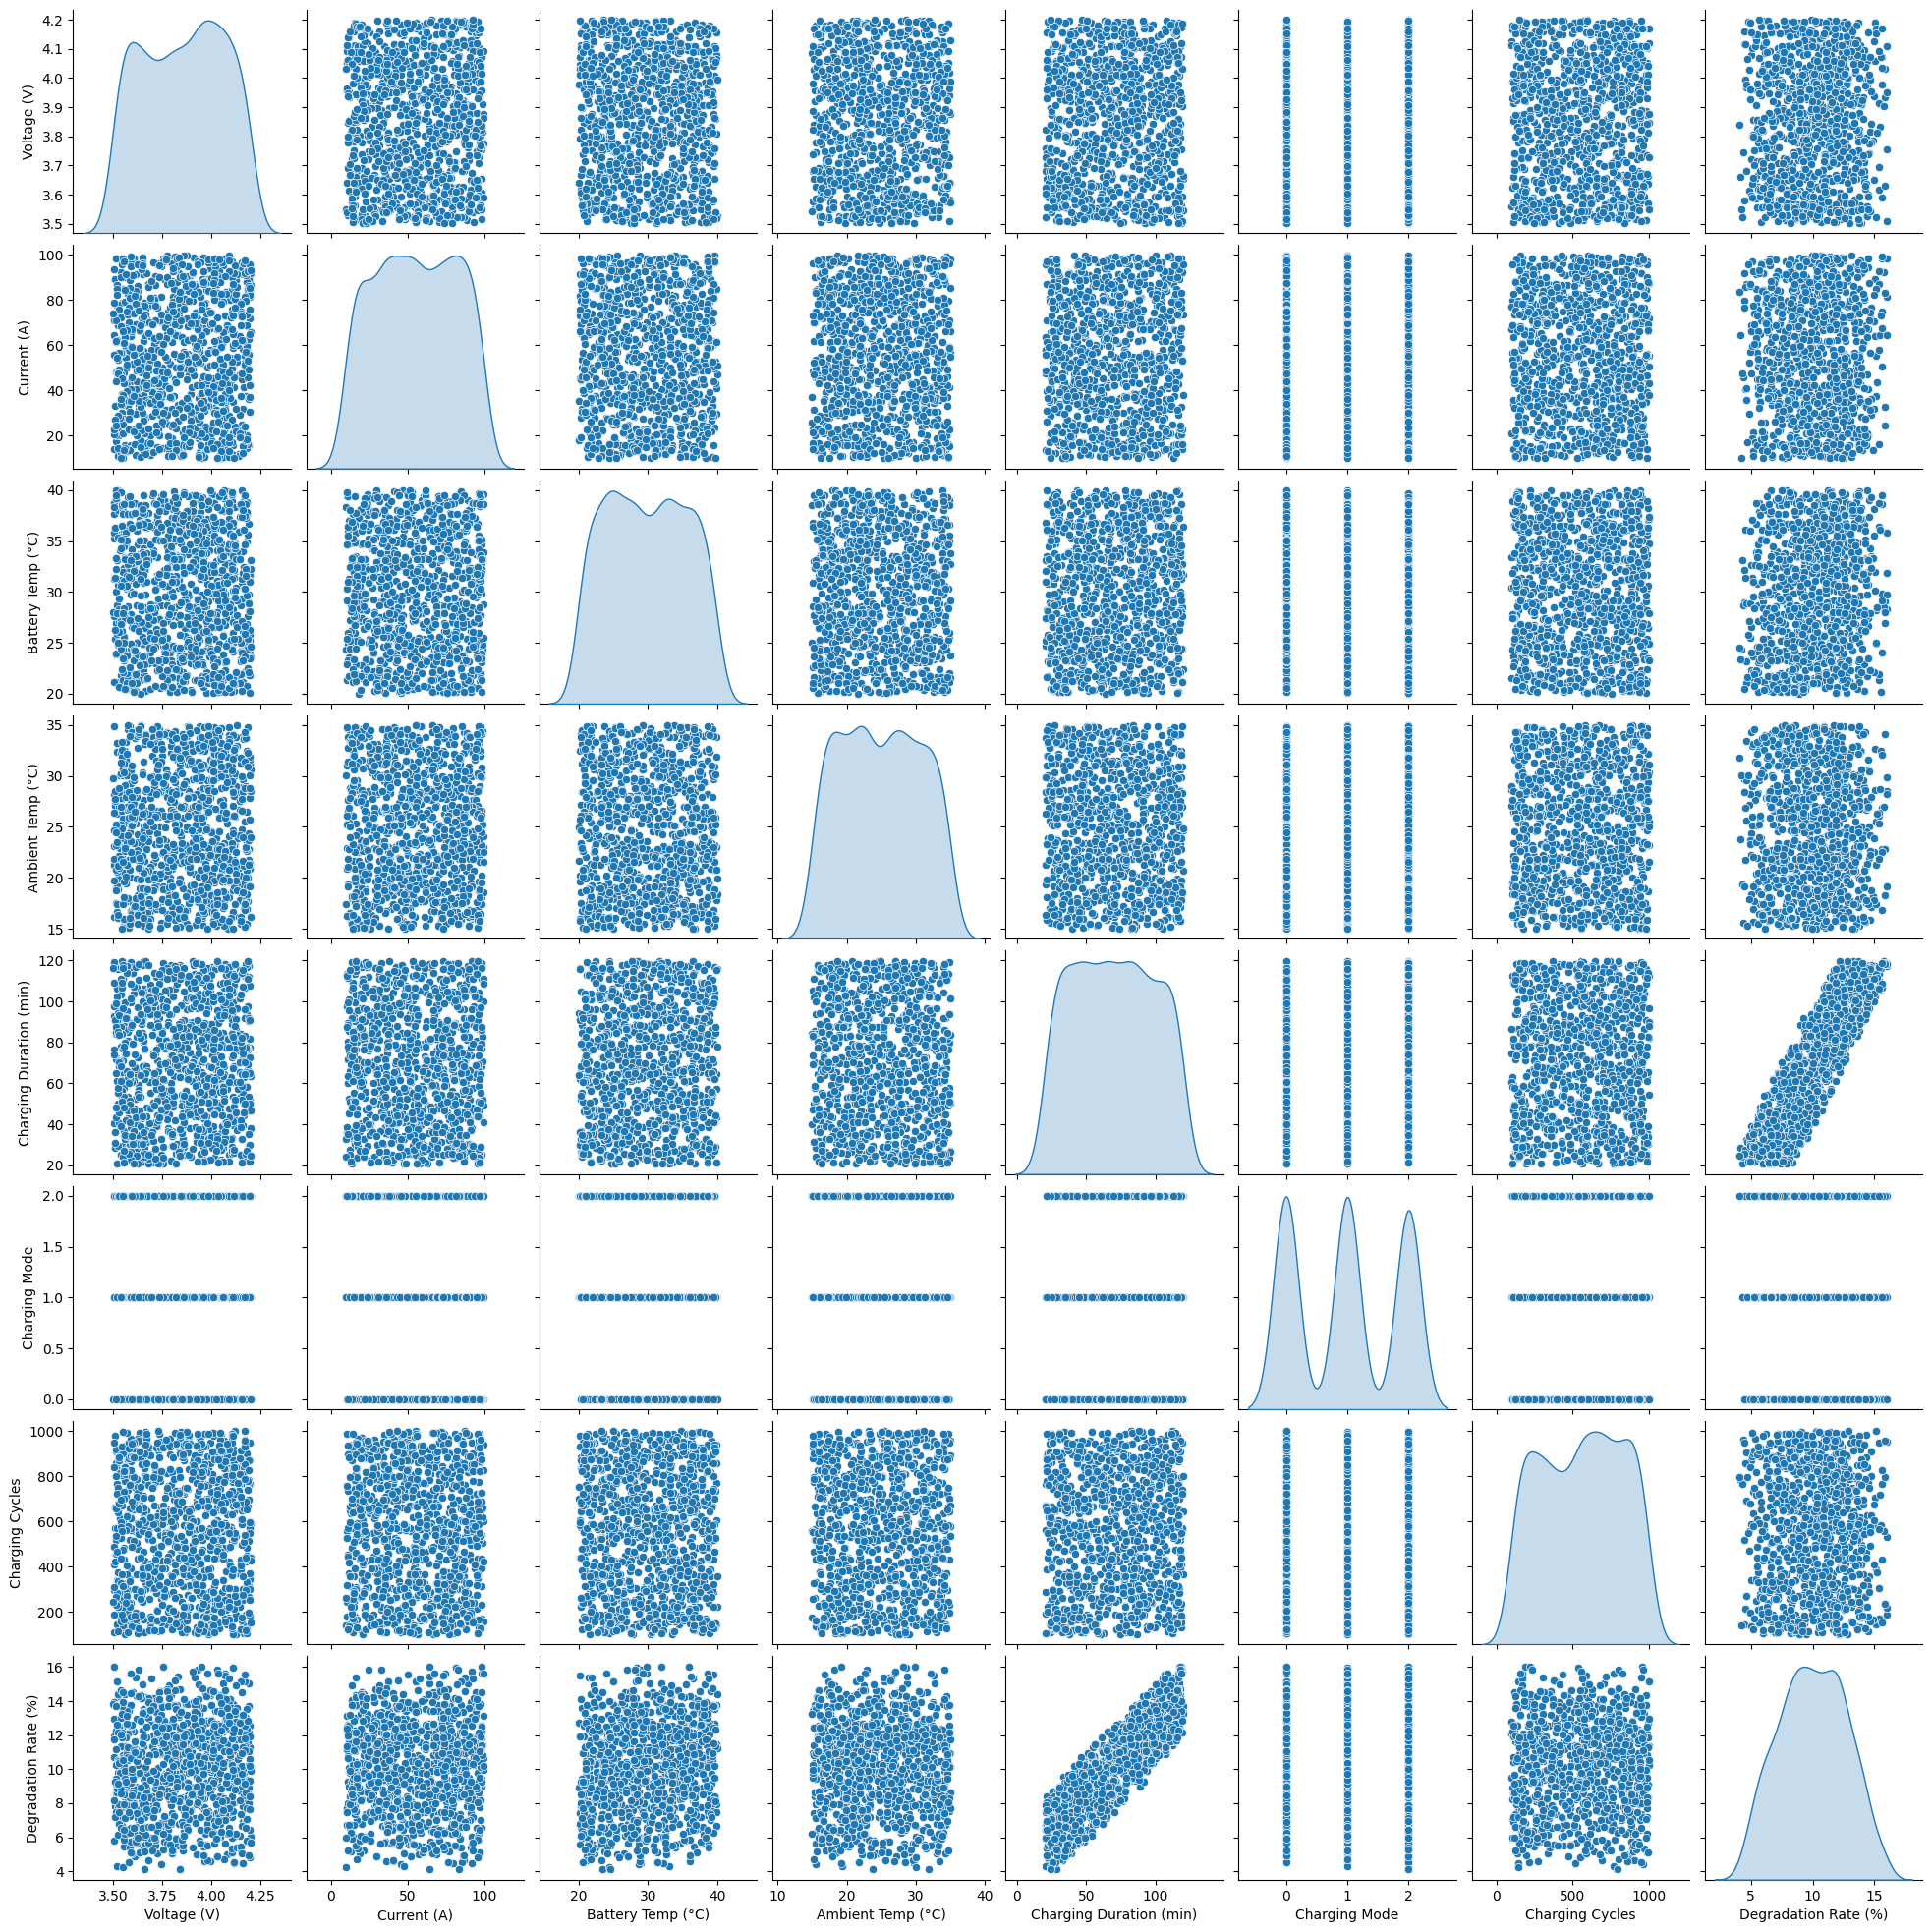

In [102]:
sns.pairplot(X[features_to_plot + ['Degradation Rate (%)']], diag_kind='kde')
plt.show()

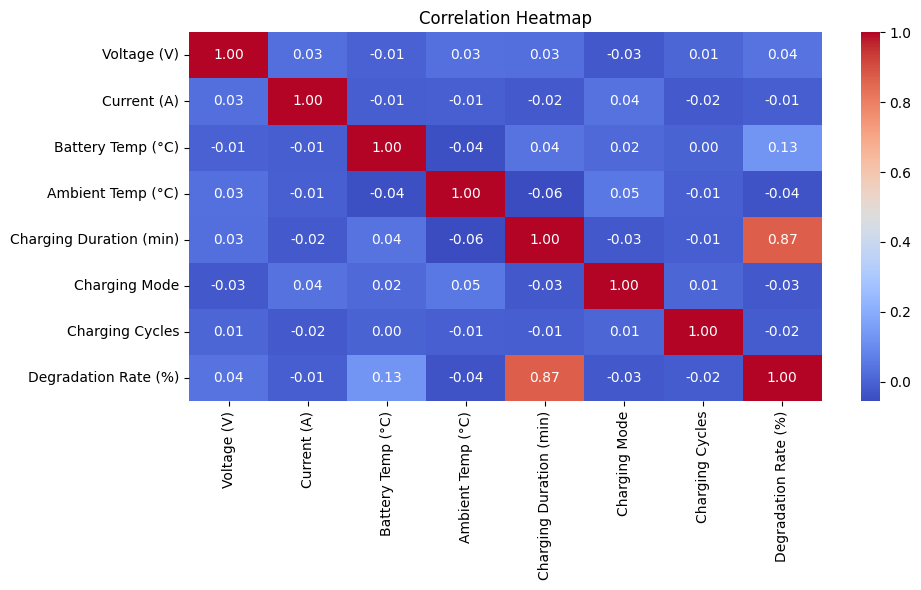

In [103]:
plt.figure(figsize=(10, 6))
corr = X[features_to_plot + ['Degradation Rate (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Add interaction terms
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interacted = interaction.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_interacted, y, test_size=0.2, random_state=42)

# Base models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)
lgbm = LGBMRegressor(random_state=42)
mlp = MLPRegressor(random_state=42, max_iter=500)

# Stack models using Ridge as meta-model
stacked = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('mlp', mlp)
    ],
    final_estimator=Ridge()
)

# Grid Search on base model
param_grid = {
    'xgb__n_estimators': [100, 200],
    'rf__n_estimators': [100, 200],
    'mlp__hidden_layer_sizes': [(64, 64), (128, 64)],
    'lgbm__num_leaves': [31, 50],
}

# GridSearchCV wraps the stacking ensemble
grid = GridSearchCV(estimator=stacked, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Predict
y_pred = grid.predict(X_test)

# Evaluate
print("Best Params:", grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 